# Parque Nacional Biodiversidade

O objetivo deste projeto é analisar dados de biodiversidade do Serviço de Parques Nacionais, particularmente em torno de várias espécies observadas em diferentes locais de parques nacionais.

Perguntas que este projeto procurou responder:

- Qual é a distribuição do estado de conservação das espécies?
- Certos tipos de espécies têm maior probabilidade de estarem ameaçados?
- As diferenças entre as espécies e o seu estado de conservação são significativas?
- Qual animal é mais prevalente e qual a sua distribuição nos parques?

### Importação de bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal

### Exploração de dados

Dois conjuntos de dados: `Observations.csv` e `Species_info.csv`

#### **Observations**

O `Observations.csv` contém informações de avistamentos registrados de diferentes espécies nos parques nacionais nos últimos 7 dias. As colunas incluídas são:

- **scientific_name** - O nome científico de cada espécie 
- **park_name** - O nome do parque nacional
- **oberservations** - O número de observações nos últimos 7 dias

In [2]:
# Carregando dataset 
df_oberservations = pd.read_csv("./observations.csv")
df_oberservations.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


Obersevando as células abaixo, o conjunto possui 23.296 linhas e 3 colunas, com 15 valores duplicados e 0 valores ausentes.
Para tratar os dados, utilizamos a função `drop_duplicates` para remover as linhas duplicadas.

In [3]:
# Resumo de informações
df_oberservations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [5]:
# Verificando valores duplicados e ausentes
print(f"""Valores duplicados = {df_oberservations.duplicated().sum()}\n
Valores ausentes: \n{df_oberservations.isnull().sum()}
""")

Valores duplicados = 15

Valores ausentes: 
scientific_name    0
park_name          0
observations       0
dtype: int64



In [6]:
# Removendo os valores duplicados
df_oberservations = df_oberservations.drop_duplicates()

In [7]:
# Estatísticas Descritivas
df_oberservations.describe()

,observations
count,23281.000000
mean,142.280357
std,69.885439
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [19]:
# Ocorrências dos valores nos parques
print(f"""Frequência:
    {df_oberservations["scientific_name"].value_counts()[:10]}\n
    {df_oberservations["park_name"].value_counts()}
""")

Frequência:
    scientific_name
Castor canadensis        12
Canis lupus              12
Hypochaeris radicata     12
Procyon lotor            12
Holcus lanatus           12
Myotis lucifugus         12
Columba livia            12
Puma concolor            12
Streptopelia decaocto    11
Vinca major               8
Name: count, dtype: int64

    park_name
Bryce National Park                    5823
Yosemite National Park                 5821
Yellowstone National Park              5819
Great Smoky Mountains National Park    5818
Name: count, dtype: int64



In [9]:
# Valores das variáveis categóricas
print(f"""Valores das variáveis categóricas:
scientific_name = {df_oberservations["scientific_name"].unique()}\n
park_name = {df_oberservations["park_name"].unique()}
""")

Valores das variáveis categóricas:
scientific_name = ['Vicia benghalensis' 'Neovison vison' 'Prunus subcordata' ...
 'Ranunculus hebecarpus' 'Gulo gulo' 'Dichanthelium depauperatum']

park_name = ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']



#### **Species_info**

O `species_info.csv` contém informações sobre as diferentes espécies dos Parques Nacionais. As colunas no conjunto de dados incluem:
- **category** - A categoria de taxonomia para cada espécie
- **scientific_name** - O nome científico de cada espécie
- **common_names** - Os nomes comuns de cada espécie
- **conservation_status** - O estado de conservação da espécie


In [11]:
# Carregando dataset
df_species = pd.read_csv("./species_info.csv")
df_species.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


In [12]:
# Resumo de informações
df_species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [13]:
# Estatísticas Descritivas
df_species.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


Existem 7 categorias de taxonomia: 'Mamífero',  'Pássaro', 'Réptil', 'Anfíbio', 'Peixe', 'Planta Vascular' e 'Planta Avascular'

In [14]:
print(f"Taxonomia: \n {df_species["category"].unique()}")

Taxonomia: 
 ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


Observando as células abaixo, o conjunto de dados apresenta 0 valores duplicados e 5.633 valores ausentes da coluna `conservation_status`. Para tratar os dados ausentes, utilizaremos a função `fillna()` para substituir os valores ausentes por um valor específico.

In [16]:
print(f"""Valores duplicados = {df_species.duplicated().sum()}\n
Valores ausentes =\n{df_species.isnull().sum()}\n
""")

Valores duplicados = 0

Valores ausentes =
category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64




Contagem do número de observações na divisão das categorias em `conservation_status`. Existem 5.633 valores `nan`, o que significa que são espécies sem preocupações. Por outro lado, existem 161 espécies preocupantes, 16 ameaçadas de extinção, 10 ameaçadas e 4 em recuperação. 

In [17]:
print(f"""Valores da coluna consevation_status: {df_species["conservation_status"].unique()}\n
{df_species.groupby("conservation_status").size()}
""")

Valores da coluna consevation_status: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64



A coluna `conservation_status` possui vários valores possíveis:
- `Species of Concern`: em declínio ou parecem necessitar de conservação
- `Threatened`: vulnerável a perigo num futuro próximo
- `Endangered `: seriamente em risco de extinção
- `In Recovery`: anteriormente `Endangered`, mas atualmente não está em perigo de extinção em toda ou em uma parte significativa de sua área de distribuição

Na exploração, muitos valores `nan` foram detectados. Esses valores precisarão ser convertidos para `No Intervention`.

In [18]:
df_species.fillna("No Intervention", inplace=True)
print(df_species.groupby("conservation_status").size())

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64


#### **Merge**

Unir os dois conjuntos de dados para analisar os dados mais completos usando merge com base na coluna `scientific_name`,
mantendo todas as linhas do `observations.csv` e adicionando informações do `species_info.csv` onde as chaves correspondem.

In [20]:
df_merge = pd.merge(df_oberservations, df_species, on= "scientific_name", how="left")
df_filtrado = df_merge[df_merge["conservation_status"] != 'No Intervention']
df_filtrado.head(10)

,scientific_name,park_name,observations,category,common_names,conservation_status
26,Zizia trifoliata,Yosemite National Park,135,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
41,Camissonia sierrae ssp. alticola,Bryce National Park,84,Vascular Plant,"Mono Hot Springs Evening Primrose, Mono Hot Sp...",Species of Concern
79,Tofieldia glabra,Great Smoky Mountains National Park,75,Vascular Plant,"Smooth Bog-Asphodel, Smooth Tofieldia",Species of Concern
105,Accipiter cooperii,Bryce National Park,95,Bird,Cooper's Hawk,Species of Concern
130,Dichanthelium acuminatum var. acuminatum,Yosemite National Park,123,Vascular Plant,Tapered Rosette Grass,Species of Concern
183,Oncorhynchus mykiss,Yosemite National Park,118,Fish,Rainbow Trout,Threatened
201,Rugelia nudicaulis,Yosemite National Park,120,Vascular Plant,Rugel's Ragwort,Species of Concern
222,Pandion haliaetus,Yosemite National Park,134,Bird,Osprey,Species of Concern
223,Pandion haliaetus,Yosemite National Park,134,Bird,"Osprey, Western Osprey",Species of Concern
226,Iris missouriensis,Yosemite National Park,127,Vascular Plant,"Rocky Mountain Iris, Western Blue Flag, Wild I...",Species of Concern


In [21]:
# Resumo de informações
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 880 entries, 26 to 25549
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      880 non-null    object
 1   park_name            880 non-null    object
 2   observations         880 non-null    int64 
 3   category             880 non-null    object
 4   common_names         880 non-null    object
 5   conservation_status  880 non-null    object
dtypes: int64(1), object(5)
memory usage: 48.1+ KB


### Análise e Visualização dos dados

In [22]:
%matplotlib inline
plt.rcParams["figure.dpi"] = (100)
plt.rcParams["figure.figsize"] = (8, 6)

#### Distribuição do estado de conservação das espécies

Ao analisar os dados, podemos observar as seguintes categorias de status das espécies:

- **No Intervention (Sem Intervenção) – 24.721 espécies**: a maior parte das espécies está em uma condição relativamente estáveis e não enfrentam ameaças imediatas, isso pode indicar que as espécies estao sendo monitoradas, mas nao precisam de ações específicas de conservação no momento.
  
- **Species of Concern (Espécies de Interesse) – 732 espécies**: essas espécies são de preocupação para os conservacionistas, o que pode indicar que estão começando a mostrar sinais de problemas ou que seu status de conservação ainda precisa ser melhor avaliado.

- **Endangered (Em perigo) – 80 espécies**: essas espécies enfrentam um risco de extinção e, portanto, precisam de atenção e medidas específicas para sua proteção e recuperação.

- **Threatened (Ameaçada) – 44 espécies**: essas espécies enfrentam um risco muito alto e imediato de extinção. Elas estão em uma situação crítica, e medidas urgentes de conservação são necessárias para evitar sua extinção.

- **In Recovery (Em Recuperação) – 24 espécies**: é um sinal positivo, indicando que essas espécies estavam em risco anteriormente, mas estão mostrando sinais de recuperação devido a esforços de conservação ou mudanças em seu ambiente.

In [29]:
conservacao_especies = df_merge["conservation_status"].value_counts()
conservacao_especies

conservation_status
No Intervention       24721
Species of Concern      732
Endangered               80
Threatened               44
In Recovery              24
Name: count, dtype: int64

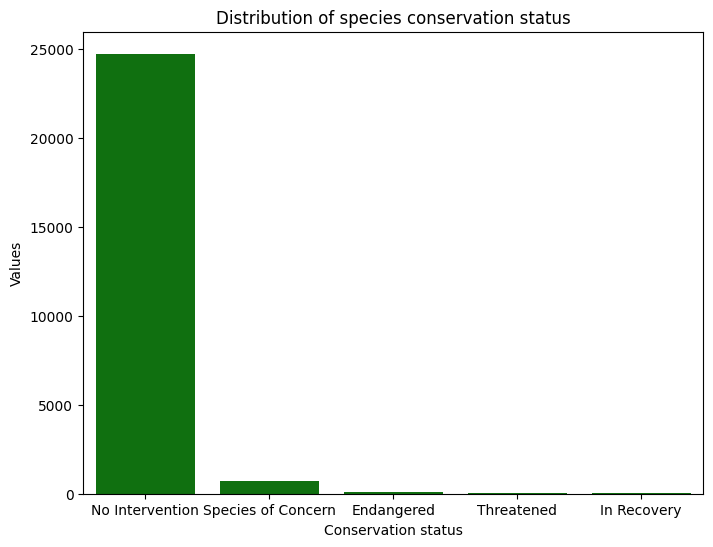

In [30]:
# Vizualização dos dados
ax1 = sns.barplot(x=conservacao_especies.index, 
                  y=conservacao_especies.values,
                  color="green")

ax1.set_title("Distribution of species conservation status")
ax1.set_xlabel("Conservation status")
ax1.set_ylabel("Values")
plt.show()

#### Tipos de espécies têm maior probabilidade de estarem ameaçados

Ao analisar os dados, podemos observar os seguintes tipos de espécies:

- **Aves (Birds)**: Com 320 espécies de interesse, 16 em perigo e 12 em recuperação, as aves apresentam preocupação, mas sem espécies classificadas como ameaçadas, sugerindo que a maioria ainda não enfrenta uma crise imediata.

- **Mamíferos (Mammals)**: Têm 44 espécies em perigo, 8 ameaçadas e 168 de interesse. Esses números indicam que os mamíferos enfrentam desafios significativos de conservação e requerem atenção para evitar agravamento da situação.

- **Peixes (Fish)**: Apresentam 20 espécies ameaçadas e 12 em perigo, mas nenhuma em recuperação, o que aponta para uma situação crítica sem sinais de melhoria.

- **Plantas Vasculares (Vascular Plants)**: Com 172 espécies de interesse, 8 ameaçadas e 4 em perigo, a ausência de recuperação indica que os esforços de conservação ainda não reverteram o risco.

- **Anfíbios (Amphibians), Plantas Não Vascular (Nonvascular Plants) e Répteis (Reptiles)**: Estes grupos apresentam poucos números em categorias críticas, sugerindo menor nível de ameaça em comparação com outros.

In [27]:
category_by_conservation = df_filtrado.groupby(["category", "conservation_status"]).size().unstack().fillna(0)
category_by_conservation

conservation_status,Endangered,In Recovery,Species of Concern,Threatened
category,,,,
Amphibian,4.0,0.0,16.0,8.0
Bird,16.0,12.0,320.0,0.0
Fish,12.0,0.0,16.0,20.0
Mammal,44.0,12.0,168.0,8.0
Nonvascular Plant,0.0,0.0,20.0,0.0
Reptile,0.0,0.0,20.0,0.0
Vascular Plant,4.0,0.0,172.0,8.0


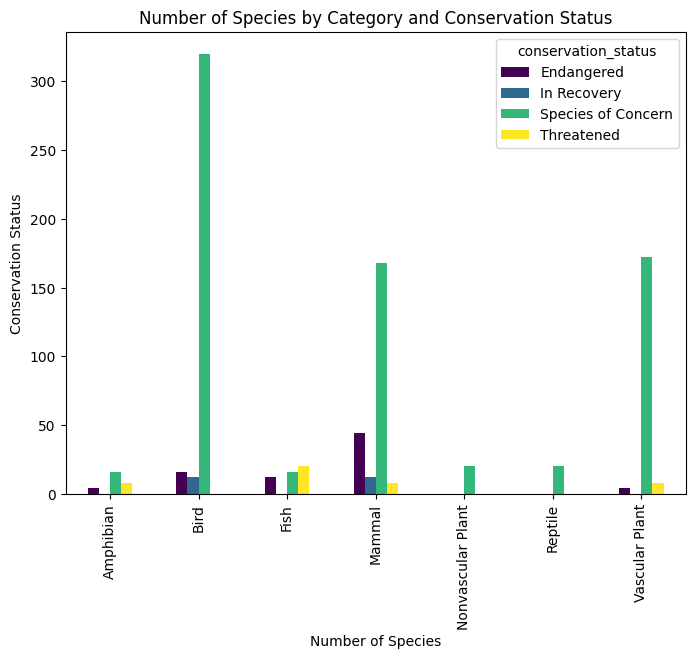

In [28]:
# Vizualização dos dados
ax2 = category_by_conservation.plot(kind = "bar", 
                                    stacked=False,
                                    colormap="viridis")

ax2.set_title("Number of Species by Category and Conservation Status")
ax2.set_xlabel("Number of Species")
ax2.set_ylabel("Conservation Status")
plt.show()

## Diferenças entre as espécies e o seu estado de conservação

Ao analisar os dados, podemos observar os seguintes diferenças:

- **Em Perigo (Endangered) – 43.91:** As espécies nessa categoria enfrentam um alto risco de extinção. A média indica que essas espécies estão em uma situação crítica, exigindo atenção urgente para sua sobrevivência.

- **Em Recuperação (In Recovery) – 87.79:** As espécies em recuperação mostram uma média mais alta, indicando que os esforços de conservação estão tendo impacto positivo. No entanto, essas espécies ainda precisam de monitoramento contínuo para garantir sua recuperação completa.
  
- **Espécies de Interesse (Species of Concern) – 128.36:** Essa categoria tem a maior média, sugerindo que muitas espécies estão sob vigilância, mas ainda não atingiram um estado crítico. Essas espécies precisam de acompanhamento para evitar uma piora em seu status de conservação.
  
- **Ameaçadas (Threatened) – 75.89:** As espécies ameaçadas têm uma média intermediária, o que indica que estão em risco elevado de extinção, embora ainda não estejam na categoria "Em Perigo". A necessidade de ações preventivas é evidente para evitar que mais espécies se movam para a categoria de maior risco.

In [31]:
conservation_by_oberservations = df_filtrado.groupby("conservation_status")["observations"].mean()
conservation_by_oberservations

conservation_status
Endangered             43.912500
In Recovery            87.791667
Species of Concern    128.363388
Threatened             75.886364
Name: observations, dtype: float64

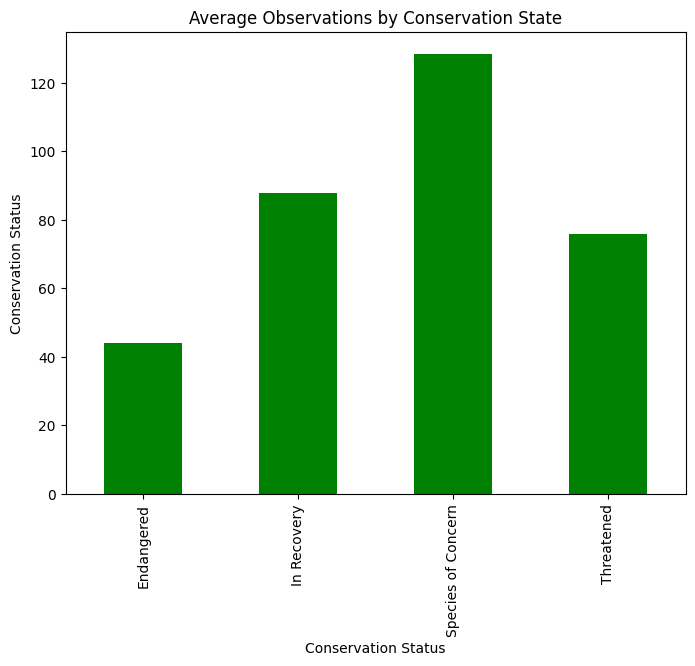

In [32]:
# Vizualização dos dados
ax3 = conservation_by_oberservations.plot(kind="bar", 
                                          color="green")
                                          
ax3.set_title("Average Observations by Conservation State")
ax3.set_xlabel("Conservation Status")
ax3.set_ylabel("Conservation Status")
plt.show()


O teste de Kruskal, demonstra que as diferenças entre os estados de conservação das espécies são estatisticamente significativas. Isso significa que há uma variação substancial entre os grupos de espécies com diferentes status de conservação, e essas diferenças não são devidas ao acaso.

In [33]:
# Teste de Kruskal-Wallis
conservation_by_oberservations = [group["observations"].values for name, group in df_merge.groupby("conservation_status")]
stat, p = kruskal(*conservation_by_oberservations)

print(f"""Estatística do teste: {stat}
Valor-p: {p}""")

if p < 0.05:
    print("é significativa")
else:
    print("não é significativa")


Estatística do teste: 286.5417673117656
Valor-p: 8.658137980943161e-61
é significativa


#### Animais prevalentes e sua distribuição nos parques

Ao analisar os dados, podemos observar os animais em sua distribuição nos parques:

- O **Yellowstone National Park** tem o maior número de observações, com 44.583 registros, sugerindo uma grande biodiversidade ou esforços intensos de monitoramento.

- O **Yosemite National Park** segue com 26.913 observações, enquanto o **Bryce National Park** (18.609) e o **Great Smoky Mountains National Park** (12.816) têm números menores, mas ainda significativos.

In [34]:
# Soma de observações em cada parque
park_name_by_obervations = df_filtrado.groupby("park_name")["observations"].sum().sort_values(ascending=False)
park_name_by_obervations

park_name
Yellowstone National Park              44583
Yosemite National Park                 26913
Bryce National Park                    18609
Great Smoky Mountains National Park    12816
Name: observations, dtype: int64

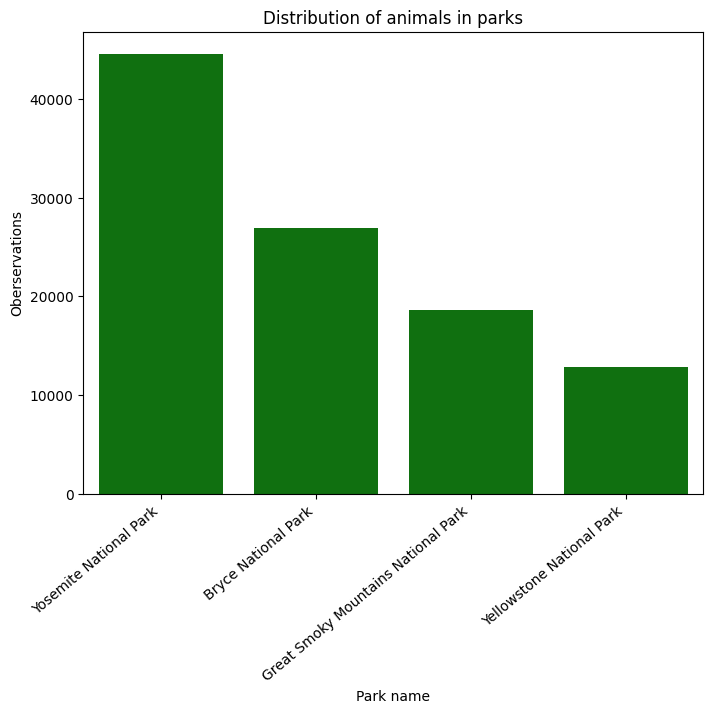

In [35]:
# Vizualização dos dados
ax4 = sns.barplot(data=park_name_by_obervations, 
                  color="green")
ax4.set_title("Distribution of animals in parks")
ax4.set_xlabel("Park name")
ax4.set_ylabel("Oberservations")
ax4.set_xticks(range(len(df_filtrado["park_name"].unique())))
ax4.set_xticklabels(df_filtrado["park_name"].unique(), rotation= 40, ha="right")
plt.show()

A espécie mais observada é o Myotis lucifugus (morcego marrom), com 4.641 observações. O Myotis lucifugus pode ter uma ampla distribuição ou ser particularmente prevalente nas áreas monitoradas, destacando sua relevância ecológica nos parques analisados.

In [36]:
# Espécie mais observada
scientific_name_by_obervations = df_filtrado.groupby("scientific_name")["observations"].sum().sort_values(ascending=False).head(1)
scientific_name_by_obervations

scientific_name
Myotis lucifugus    4641
Name: observations, dtype: int64

### Conclusão

**Respostas às Perguntas**

- Qual é a distribuição do estado de conservação das espécies?
  - Com base nos resultados fornecidos, a distribuicoes apresentadas sao:
    | Conservation Status  | Oberservations |
    |----------------------|-------|
    |   No Intervention    | 24721 |
    |   Species of Concern | 732   |
    |   Endangered         | 80    |
    |   Threatened         | 44    |
    |   In Recovery        | 24    |

- Certos tipos de espécies têm maior probabilidade de estarem ameaçados?
  - Sim, as Aves e Mamíferos têm maior probabilidade de estarem ameaçados, com uma combinação significativa de espécies em perigo e ameaçadas.
  
- As diferenças entre as espécies e o seu estado de conservação são significativas?
  - Sim, as espécies em recuperação e de interesse tendem a apresentar condições mais favoráveis em comparação com aquelas em perigo ou ameaçadas, e as diferenças entre esses grupos são significativas. 
  
- Qual animal é mais prevalente e qual a sua distribuição nos parques? 
  - O animal mais prevalente é Myotis lucifugus com um valor igual a 4641 de distribuição nos parques

**Conclusão Geral**

A análise mostrou que a maioria das espécies está estável, mas aves e mamíferos têm maior risco de extinção, com várias espécies em perigo ou ameaçadas. Espécies em recuperação apresentam melhores perspectivas, mas ainda precisam de atenção. O Myotis lucifugus é o animal mais observado, e parques como Yellowstone e Yosemite registram o maior número de observações, refletindo alta biodiversidade ou esforços intensos de monitoramento. A conservação contínua é essencial para proteger espécies em risco.